# Using the no-reference metrics: NPS, MTF, and NEQ.

In [1]:
from xdesign import *
import tomopy
import numpy as np
import matplotlib.pylab as plt

`polytope` failed to import `cvxopt.glpk`.
Will use `scipy.optimize.linprog`.


Generate a UnitCircle test phantom. For the MTF, the radius must be less than 0.5, otherwise the circle touches the edges of the field of view.

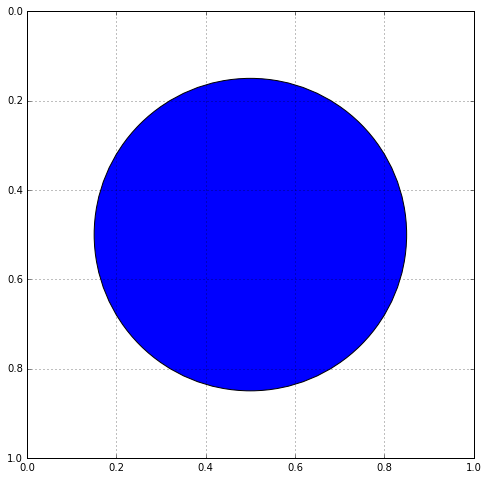

In [2]:
p = UnitCircle(value=4, radius=0.35)
plot_phantom(p)
plt.show()

Generate two sinograms and reconstruct. Collecting two sinograms allows us to isolate the noise by subtracting out the circle.

In [3]:
sinoA = sinogram(100, 100, p, noise=0.1)
sinoB = sinogram(100, 100, p, noise=0.1)
theta = np.arange(0, np.pi, np.pi / 100.)

recA = tomopy.recon(np.expand_dims(sinoA, 1), theta,
                    algorithm='gridrec', center=(sinoA.shape[1]-1)/2.)
recB = tomopy.recon(np.expand_dims(sinoB, 1), theta,
                    algorithm='gridrec', center=(sinoB.shape[1]-1)/2.)

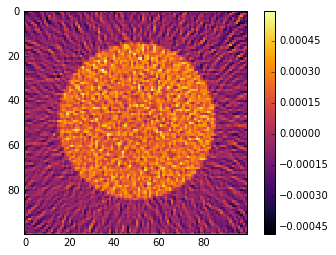

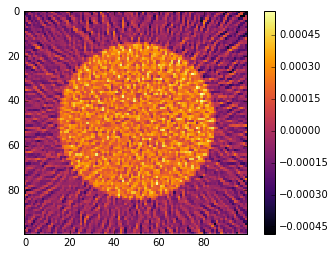

In [4]:
plt.figure()
plt.imshow(recA[0], cmap='inferno', interpolation="none")
plt.colorbar()
plt.figure()
plt.imshow(recB[0], cmap='inferno', interpolation="none")
plt.colorbar()
plt.show()

Calculate NEQ, NPS, and/or MTF

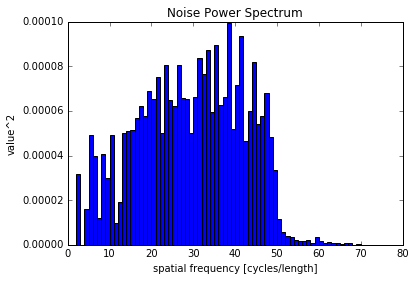

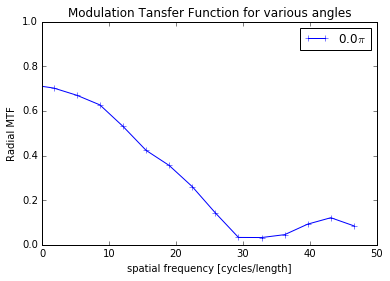

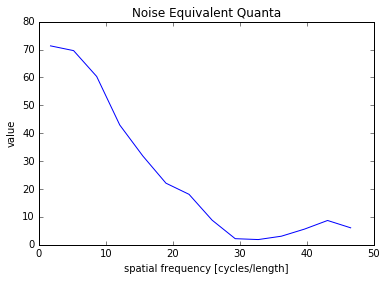

In [5]:
compute_neq(p, recA[0], recB[0])
plt.show()

You can also get the 2D frequency plot of the NPS.

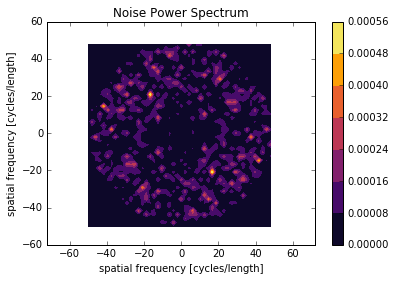

In [6]:
compute_nps(p, recA[0], plot_type='frequency',B=recB[0])
plt.show()